In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import timedelta  



In [ ]:
co_table=pd.read_csv('/Users/sadafraoufi/Desktop/covid_19_clean_complete.csv')
co_table.sample(6)

In [ ]:
!pip install calmap

In [ ]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
co_table['Active'] = co_table['Confirmed'] - co_table['Deaths'] - co_table['Recovered']
co_table['Country/Region'] = co_table['Country/Region'].replace('Mainland China', 'China')
co_table[['Province/State']] = co_table[['Province/State']].fillna('')
co_table[cases] = co_table[cases].fillna(0)
co_table['Recovered'] = co_table['Recovered'].astype(int)

co_table.sample(6)

In [ ]:
temp = co_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp['Global Mortality'] = temp['Deaths']/temp['Confirmed']
temp['Deaths per 100 Confirmed Cases'] = temp['Global Mortality']*100
temp.style.background_gradient(cmap='Pastel1')

In [6]:
ship = co_table[co_table['Province/State'].str.contains('Grand Princess')|co_table['Country/Region'].str.contains('Diamond Princess')]

china = co_table[co_table['Country/Region']=='China']
row = co_table[co_table['Country/Region']!='China']

co_latest = co_table[co_table['Date'] == max(co_table['Date'])].reset_index()
china_latest = co_latest[co_latest['Country/Region']=='China']
row_latest = co_latest[co_latest['Country/Region']!='China']

co_latest_grouped = co_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [7]:
temp_f = co_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f[['Country/Region', 'Confirmed', 'Active', 'Deaths', 'Recovered']]
temp_f = temp_f.reset_index(drop=True)

temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

,Country/Region,Confirmed,Active,Deaths,Recovered
0,China,80860,18933,3123,58804
1,Italy,9172,7985,463,724
2,South Korea,7478,7307,53,118
3,Iran,7161,4530,237,2394
4,France,1217,1186,19,12
5,Germany,1176,1156,2,18
6,Spain,1073,1013,28,32
7,Cruise Ship,696,650,6,40
8,Japan,511,425,10,76
9,Switzerland,374,369,2,3


In [8]:
temp_flg = temp_f[temp_f['Deaths']>0][['Country/Region', 'Deaths']]
temp_flg['Deaths / 100 Cases'] = round((temp_f['Deaths']/temp_f['Confirmed'])*100, 2)
temp_flg.sort_values('Deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Country/Region,Deaths,Deaths / 100 Cases
0,China,3123,3.86
1,Italy,463,5.05
2,Iran,237,3.31
3,South Korea,53,0.71
4,Spain,28,2.61
5,France,19,1.56
6,Japan,10,1.96
7,Iraq,6,10
8,Cruise Ship,6,0.86
9,United Kingdom,4,1.24


In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [49]:
gt_1000 = co_latest_grouped[co_latest_grouped['Confirmed']>1000]['Country/Region'].unique()

In [50]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

NameError: name 'HTML' is not defined

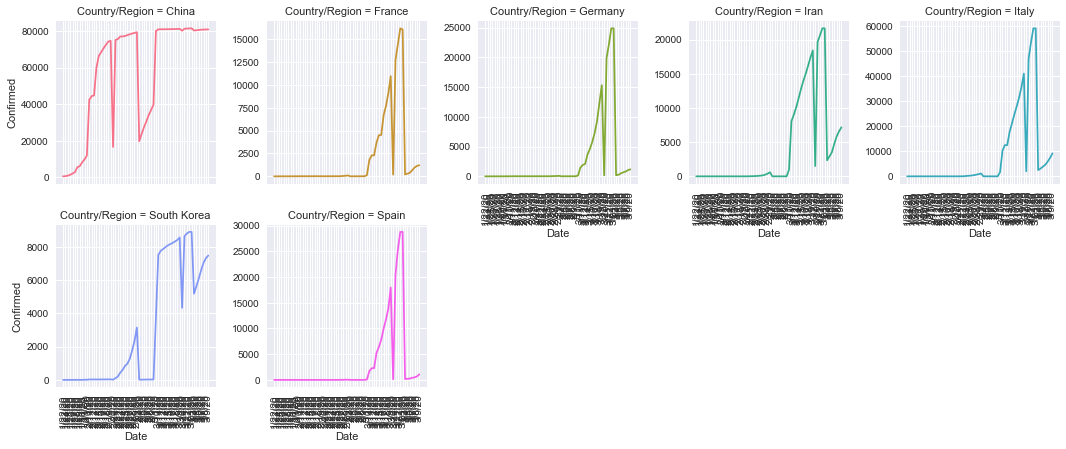

In [51]:
import matplotlib.pyplot as plt 
temp = co_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])
temp = temp[temp['Country/Region'].isin(gt_1000)]

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", sharey=False, col_wrap=5)
g = g.map(plt.plot,"Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()



In [13]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
import datetime
import operator 

In [15]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

In [16]:
confirmed_df_global=pd.read_csv('/Users/sadafraoufi/Desktop/COVID-19-master-4/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df_global=pd.read_csv('/Users/sadafraoufi/Desktop/COVID-19-master-4/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df_global=pd.read_csv('/Users/sadafraoufi/Desktop/COVID-19-master-4/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('/Users/sadafraoufi/Desktop/COVID-19-master-4/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv')



In [17]:
latest_data.head(6)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-10 22:54:07,34.223334,-82.461707,7,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-10 22:54:07,30.295065,-92.414197,94,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-10 22:54:07,37.767072,-75.632346,12,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-10 22:54:07,43.452658,-116.241552,495,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-10 22:54:07,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-04-10 22:54:07,37.104598,-85.281297,6,0,0,0,"Adair, Kentucky, US"


In [18]:
cols = confirmed_df_global.keys()

In [19]:
date_confirmed=confirmed_df_global.loc[:,cols[4]:cols[-1]]
date_deaths=deaths_df_global.loc[:,cols[4]:cols[-1]]
date_recovered = recovered_df_global.loc[:, cols[4]:cols[-1]]

In [20]:
dates = date_confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate =[] 
total_recovered =[] 
total_active =[] 
iran_cases=[]

In [21]:
for i in dates:
    confirmed_sum =date_confirmed[i].sum()
    death_sum = date_deaths[i].sum()
    recovered_sum = date_recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    iran_cases.append(confirmed_df_global[confirmed_df_global['Country/Region']=='Iran'][i].sum())

In [22]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
iran_daily_increase = daily_increase(iran_cases)

In [23]:
import numpy as np

In [34]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(80, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
#?????

In [35]:
world_cases=np.array(world_cases).reshape(-1,1)

counting=np.count_nonzero(world_cases)
print(counting)

80


In [36]:
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [37]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [38]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [39]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False) 

In [40]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/Users/saeed/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 669082.885073713
MSE: 470000297046.48267


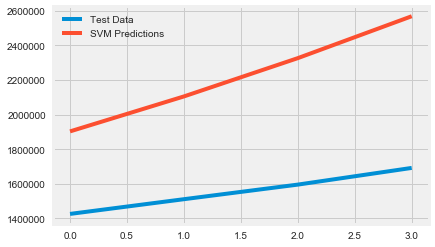

In [41]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [42]:
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [43]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 53707.94948119111
MSE: 3043002347.941029


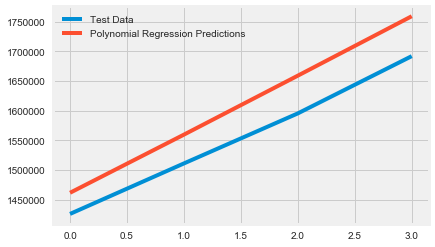

In [45]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])